In [2]:
# Import packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import Orthoscripts

In [3]:
# Holothuria leucospilota
Holleu = Orthoscripts.readBED("Data/Genelists/Holothuria.leucospilota.genelist.bed")

# Branchiostoma floridae
Braflo = np.loadtxt("Braflo_info_ra.txt", dtype = "str")
Braflo = pd.DataFrame(Braflo, columns = ['Name', 'Chromosome', 'Start', 'End', 'Dot'])

# Pecten maximus
Pecmax = Orthoscripts.readBED("Data/Genelists/Pecten.maximus.genelist.bed")

# Orthologies
Pecmax_Holleu = np.loadtxt("orthology_pipeline/orthologs/Pecmax+Holleu_sensitive.txt", dtype = "str")
Pecmax_Braflo = np.loadtxt("orthology_pipeline/orthologs/Pecmax+Braflo_sensitive.txt", dtype = "str")
Holleu_Braflo = np.loadtxt("orthology_pipeline/orthologs/Holleu+Braflo_sensitive.txt", dtype = "str")

In [16]:
# Pecten data: Calculate number of genes on each scaffold
Pecmax_ortho = Pecmax.groupby('Chromosome').size()
Pecmax_ortho = Pecmax_ortho.reset_index()

Pecmax_ortho.columns = ['Chromosome', 'Count']
Pecmax_ortho = Pecmax_ortho.loc[Pecmax_ortho['Count'] >= 100]

scaffolds = Pecmax_ortho.Chromosome.tolist() # Remove all values from non-chromosome scaffolds
Pecmax = Pecmax.loc[Pecmax['Chromosome'].isin(scaffolds)]

# Branchiostoma data: remove suffix
Braflo = Braflo.loc[Braflo['Chromosome'].str.contains('BFL_')]

In [17]:
# Replace scaffold names with chromosome names
Pecmax = Pecmax.replace('HiC_scaffold_2', 'PYE_1')
Pecmax = Pecmax.replace('HiC_scaffold_18', 'PYE_2')
Pecmax = Pecmax.replace('HiC_scaffold_19', 'PYE_3')
Pecmax = Pecmax.replace('HiC_scaffold_16', 'PYE_4')
Pecmax = Pecmax.replace('HiC_scaffold_4', 'PYE_5')
Pecmax = Pecmax.replace('HiC_scaffold_7', 'PYE_6')
Pecmax = Pecmax.replace('HiC_scaffold_11', 'PYE_7')
Pecmax = Pecmax.replace('HiC_scaffold_15', 'PYE_8')
Pecmax = Pecmax.replace('HiC_scaffold_17', 'PYE_9')
Pecmax = Pecmax.replace('HiC_scaffold_10', 'PYE_10')
Pecmax = Pecmax.replace('HiC_scaffold_1', 'PYE_11')
Pecmax = Pecmax.replace('HiC_scaffold_3', 'PYE_12')
Pecmax = Pecmax.replace('HiC_scaffold_12', 'PYE_13')
Pecmax = Pecmax.replace('HiC_scaffold_5', 'PYE_14')
Pecmax = Pecmax.replace('HiC_scaffold_9', 'PYE_15')
Pecmax = Pecmax.replace('HiC_scaffold_14', 'PYE_16')
Pecmax = Pecmax.replace('HiC_scaffold_13', 'PYE_17')
Pecmax = Pecmax.replace('HiC_scaffold_8', 'PYE_18')
Pecmax = Pecmax.replace('HiC_scaffold_6', 'PYE_19')

Pecmax = Pecmax.loc[Pecmax['Chromosome'].str.contains('PYE_')]

In [9]:
HB = Orthoscripts.orthofy(Holleu, Braflo, Holleu_Braflo)
PB = Orthoscripts.orthofy(Pecmax, Braflo, Pecmax_Braflo)
PH = Orthoscripts.orthofy(Pecmax, Holleu, Pecmax_Holleu)

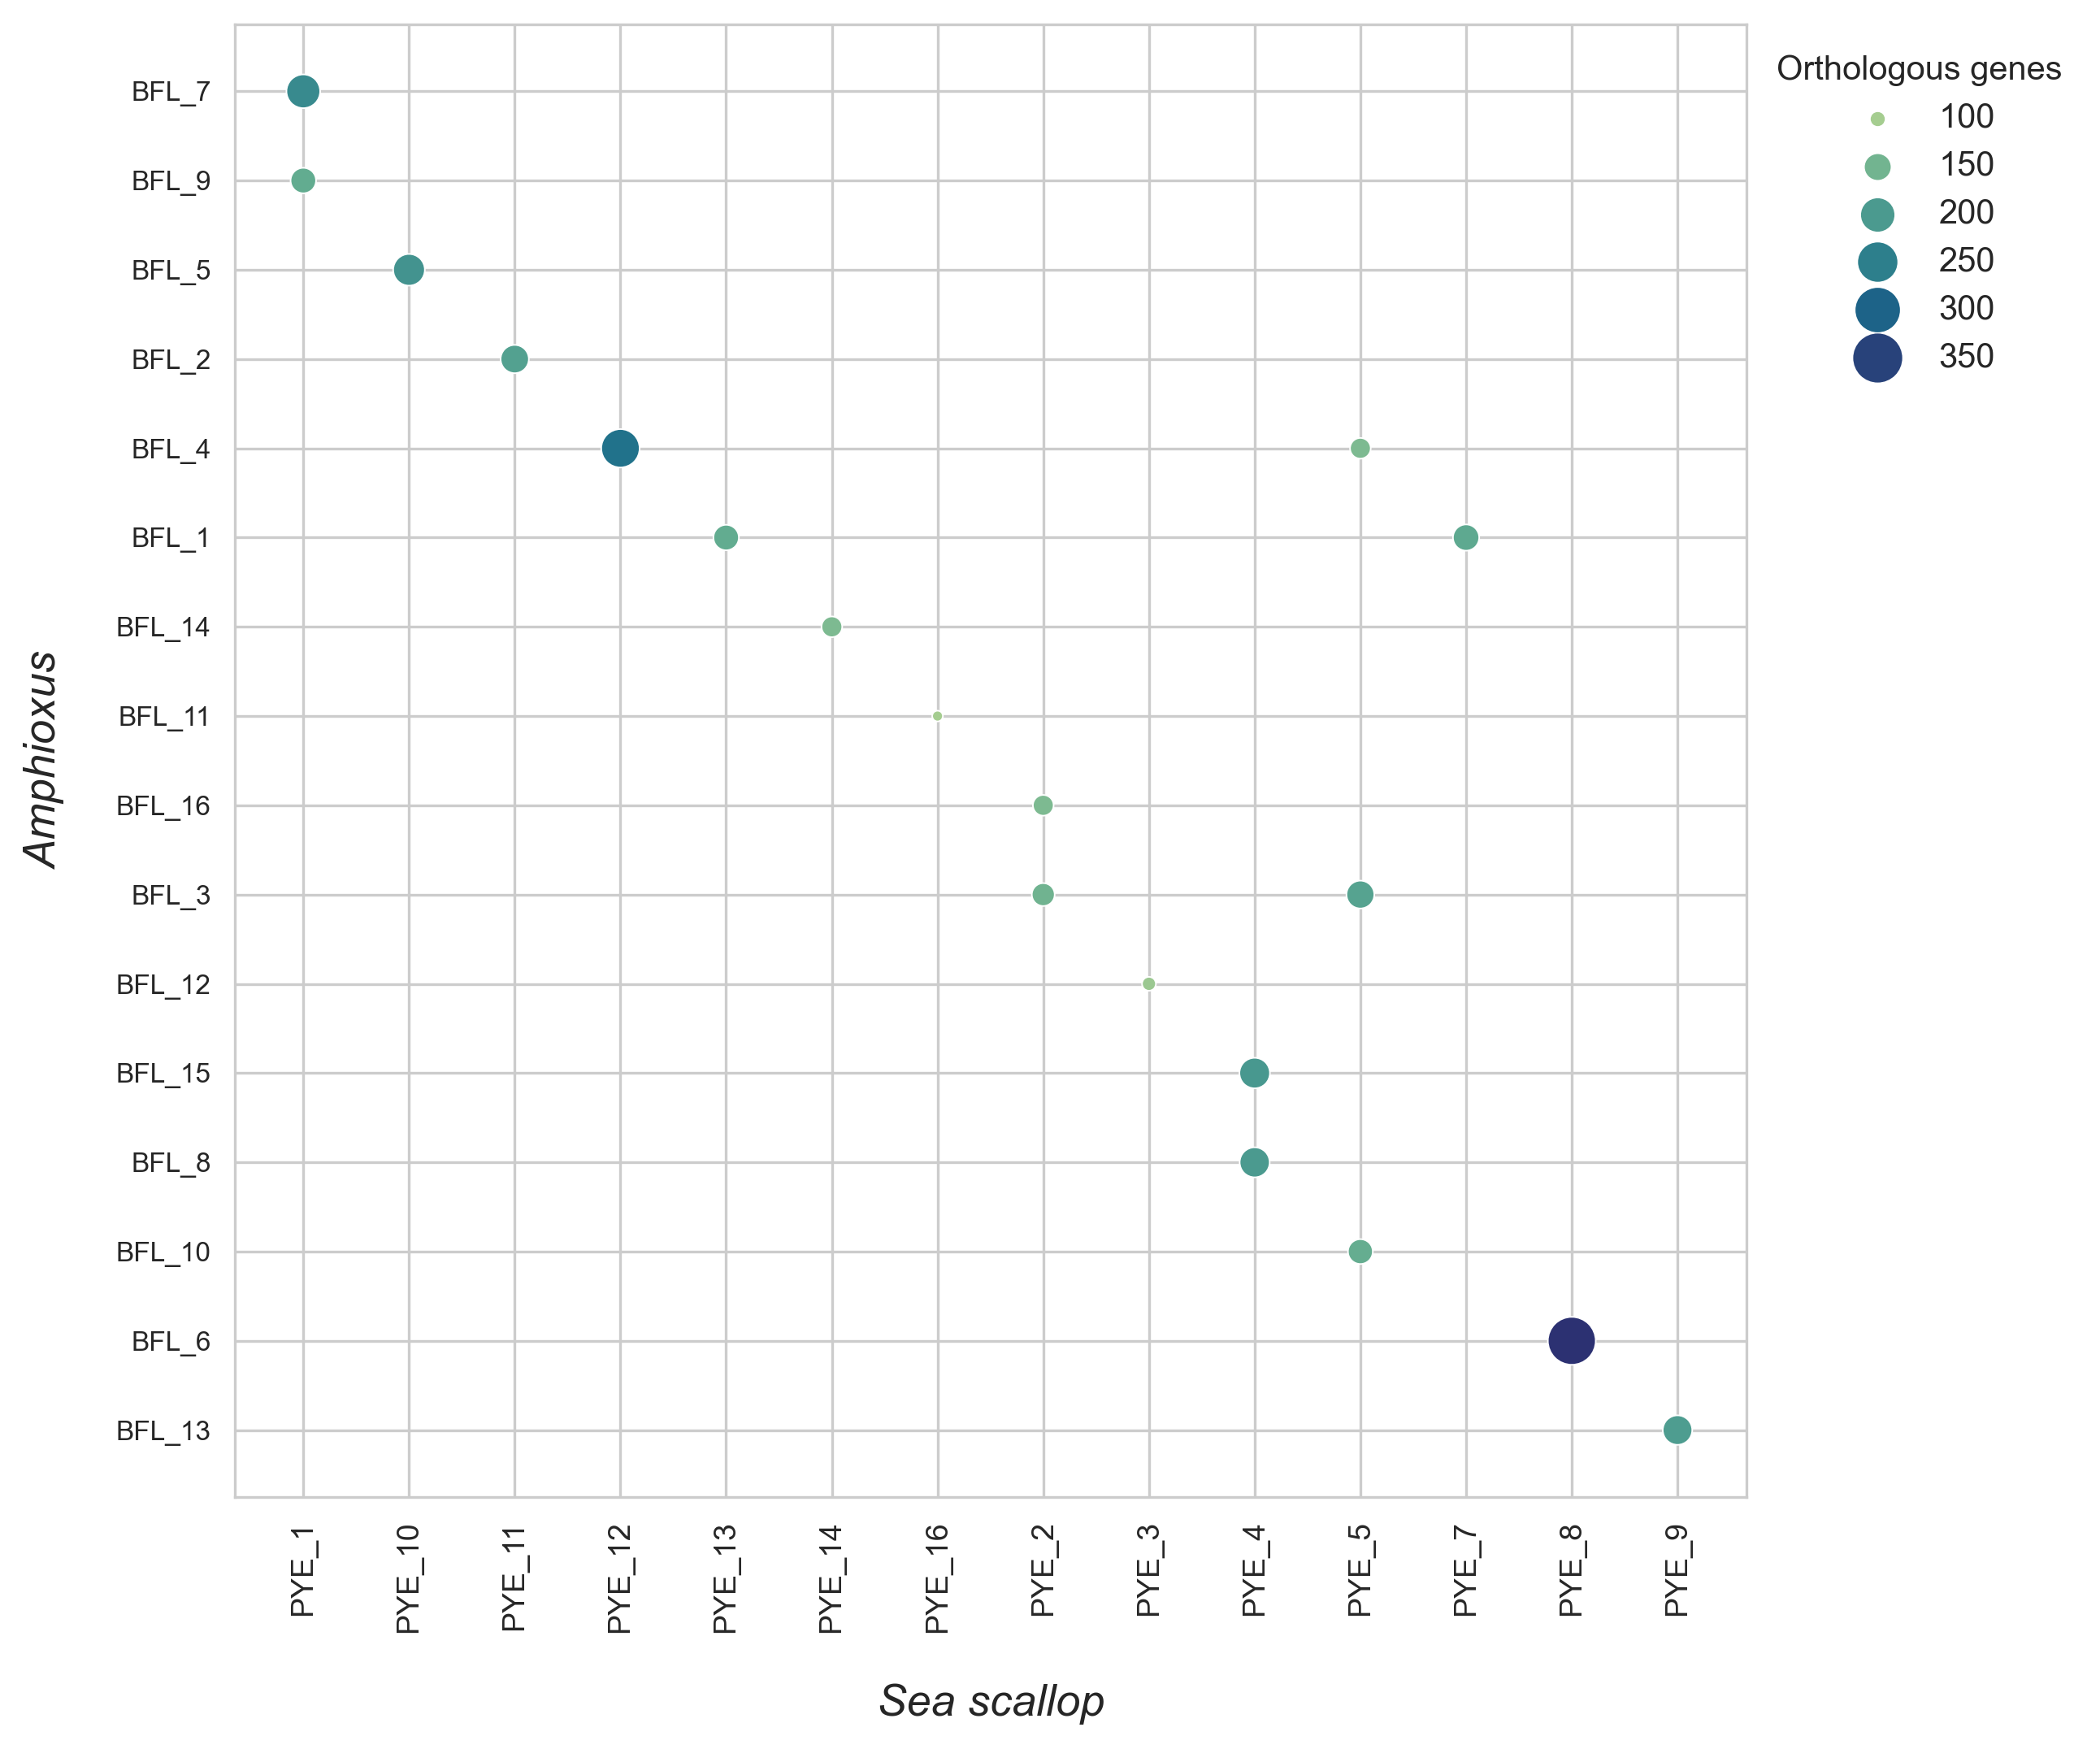

In [19]:
PB = pd.DataFrame(PB.loc[PB['Orthologs'] >= 100])
Orthoscripts.orthoplot(PB, 'Sea scallop', 'Amphioxus', 'A', 'B')